In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
dataset = pd.read_csv("./MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
feature_list = dataset.columns.values

In [5]:
dataset.shape  
dataset = dataset.replace(np.inf,np.nan)    # replacing inf with nan
dataset = dataset.fillna(dataset.mean(numeric_only=True)) # ghen converting nan to mean values

In [6]:
X = dataset.iloc[:,:-1].values
print("shape of X",X.shape)

Y = dataset.iloc[:,-1].values
print("shape of Y",Y.shape)

shape of X (225745, 78)
shape of Y (225745,)


In [7]:
print("is NaN present:",np.any(np.isnan(X)))  # to check whether the array contains nan
print("is inf present:",np.any(np.isinf(X)))  # to check whether the array contains inf
X[X < 0] = 0   # to replace all negative values with zeros

is NaN present: False
is inf present: False


In [8]:
from sklearn.feature_selection import SelectKBest  # feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [9]:
bestfeatures = SelectKBest(score_func = mutual_info_classif, k=50)
fit = bestfeatures.fit(X,Y)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(feature_list)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_chi2']  
#print 50 best features
print(featureScores.nlargest(50,'Score_chi2')) 


                Selected_columns  Score_chi2
4    Total Length of Fwd Packets    0.651943
63             Subflow Fwd Bytes    0.651785
52           Average Packet Size    0.563526
5    Total Length of Bwd Packets    0.548492
65             Subflow Bwd Bytes    0.548446
12        Bwd Packet Length Mean    0.544579
54          Avg Bwd Segment Size    0.544383
34             Fwd Header Length    0.543803
55           Fwd Header Length.1    0.543353
0               Destination Port    0.537943
10         Bwd Packet Length Max    0.528943
66        Init_Win_bytes_forward    0.498798
8         Fwd Packet Length Mean    0.490715
53          Avg Fwd Segment Size    0.489313
6          Fwd Packet Length Max    0.487262
35             Bwd Header Length    0.475964
23                   Fwd IAT Max    0.460424
20                 Fwd IAT Total    0.457921
21                  Fwd IAT Mean    0.447551
2              Total Fwd Packets    0.410415
62           Subflow Fwd Packets    0.410210
22        

In [10]:
# print(featureScores.nlargest(50,'Score_chi2').Selected_columns.values)
featureScore_after_filter = featureScores.nlargest(50,'Score_chi2')
print(featureScore_after_filter.index[0])
count = 0
ind = []
for i in featureScore_after_filter.Score_chi2:
    if i < 0.2:
        ind.append(featureScore_after_filter.index[count])
    count = count + 1
featureScore_after_filter = featureScore_after_filter.drop(ind,axis = 0)  # contains all the filtered features
X = pd.DataFrame(X)
X = X.loc[:,featureScore_after_filter.index] # contains data after filter from feature selection
print(X)

4
          4     63   52   5    65   12   54    34    55       0   ...  \
0       12.0  12.0  9.0  0.0  0.0  0.0  0.0  40.0  40.0  54865.0  ...   
1        6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  55054.0  ...   
2        6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  55055.0  ...   
3        6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  46236.0  ...   
4       12.0  12.0  9.0  0.0  0.0  0.0  0.0  40.0  40.0  54863.0  ...   
...      ...   ...  ...  ...  ...  ...  ...   ...   ...      ...  ...   
225740   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61374.0  ...   
225741   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61378.0  ...   
225742   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61375.0  ...   
225743  12.0  12.0  9.0  0.0  0.0  0.0  0.0  40.0  40.0  61323.0  ...   
225744   6.0   6.0  9.0  6.0  6.0  6.0  6.0  20.0  20.0  61326.0  ...   

                   36   39     1             14   11     18   17  \
0       666666.666700  6.0    3.0  4.000000e+06  0.0 

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler  # scaling of the data

scaler_X = StandardScaler()
x_train_scaled = scaler_X.fit_transform(x_train) # preprocessed training data
x_test_scaled = scaler_X.fit_transform(x_test) # preprocessed testing data

In [21]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state = 0)  
classifier.fit(x_train, y_train)  

c:\Users\Archit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(x_test)  

In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[17074  2415]
 [  213 25447]]


<AxesSubplot:>

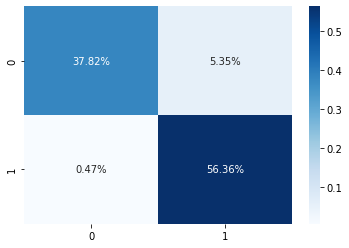

In [24]:
# heatmap of confusion matrix
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [25]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print("The accuracy of the model is:",accuracy_score(y_test, y_pred)*100,"%")

0.9417927307360074